In [42]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import math

In [3]:
path = '../_Prediction.csv'
path_data = '/Users/macone/Documents/3_dataset/ReleaseVer/'

In [4]:
df = pd.read_csv(path)
# print(df.head())
# print(df.tail())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5478 non-null   int64  
 1   img              5478 non-null   object 
 2   cond             5478 non-null   object 
 3   costs_full_flow  5478 non-null   float64
 4   explain_outputs  5478 non-null   object 
 5   cond_scores      5478 non-null   object 
 6   road_cond_times  5478 non-null   float64
 7   vis_est_preds    5478 non-null   object 
 8   day_night_preds  5478 non-null   object 
 9   vis_est_times    5478 non-null   float64
 10  normalize_times  5478 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 470.9+ KB
None


In [5]:
cols = df.columns.values.tolist()
print(cols)

['Unnamed: 0', 'img', 'cond', 'costs_full_flow', 'explain_outputs', 'cond_scores', 'road_cond_times', 'vis_est_preds', 'day_night_preds', 'vis_est_times', 'normalize_times']


In [74]:
vis_est_preds = ['Clear', 'L1', 'L1x', 'L2', 'L2x', 'L3', 'L4', 'Reject']
values = []

def plot_images(df_tmp, number_images, name):
    full_names = df_tmp['img'].sample(number_images)
    for idx, full_name in enumerate(full_names):
        
        pos = full_name.rfind('_')
        camera_name = full_name[:pos]
        image_name = full_name[pos+1:]
        folder_name = image_name[:8]
        print('camera name: ', camera_name)
        print('folder name: ', folder_name)
        print('image name: ', image_name)
        print()
        img = cv2.imread(os.path.join(path_data, camera_name, folder_name, image_name))
        st = f'{name}_{idx+1}.png'
        cv2.imwrite(st, img)
        # plt.figure(figsize=(30, 10))
        # plt.subplot(number_images, 1, idx+1)
        # img = plt.imread(os.path.join(path_data, camera_name, folder_name, image_name))
        # print(img.shape)
        # plt.imshow(img)
        # plt.axis('off')

for name in vis_est_preds:
    df_filter = df[df['vis_est_preds'] == name]
    print(name)
    plot_images(df_filter, 3, name)
    # print('filter by: ', name)
    # df = df[df['vis_est_preds']=='Reject']
    # print(df_reject.tail())
    # df_reject_day = df_reject[df_reject['day_night_preds'] == 'night']
    # print(df_reject)
    # print(len(df_filter))
    values.append(len(df_filter))
print(vis_est_preds)
print(values)



Clear
camera name:  G0423_K32
folder name:  20220323
image name:  20220323205502.jpg

camera name:  G1407
folder name:  20220326
image name:  20220326150031.jpg

camera name:  G1407
folder name:  20220325
image name:  20220325110033.jpg

L1
camera name:  G4_K1885
folder name:  20220326
image name:  20220326022007.jpg

camera name:  G4_K1885
folder name:  20220323
image name:  20220323085011.jpg

camera name:  G1414
folder name:  20220325
image name:  20220325200010.jpg

L1x
camera name:  G1414
folder name:  20220323
image name:  20220323025010.jpg

camera name:  G4757
folder name:  20220328
image name:  20220328010028(1).jpg

camera name:  G4757
folder name:  20220328
image name:  20220328010028.jpg

L2
camera name:  G4_K1885
folder name:  20220324
image name:  20220324095008.jpg

camera name:  G1410
folder name:  20220326
image name:  20220326182035.jpg

camera name:  G1414
folder name:  20220324
image name:  20220324052010.jpg

L2x
camera name:  G4_K1885
folder name:  20220325
image 

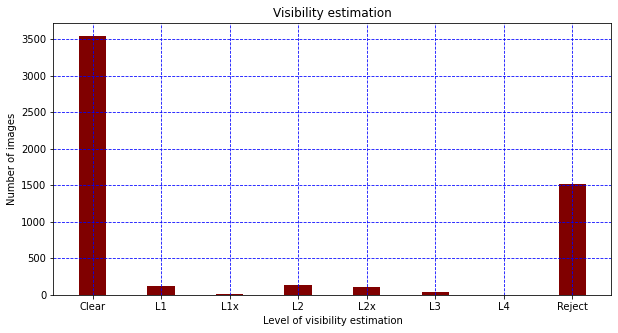

In [64]:
plt.figure(figsize=(10, 5))
plt.bar(vis_est_preds, values, color='maroon', width=0.4)
plt.grid(color='b', linestyle='--')
plt.xlabel('Level of visibility estimation')
plt.ylabel('Number of images')
plt.title('Visibility estimation')
plt.show()

In [63]:


        

# full_names = df['img'].sample(3)
# idx = 0
# for full_name in full_names:
#     # print(type(image_name))
#     # print(image_name)
#     pos = full_name.rfind('_')
#     camera_name = full_name[:pos]
#     image_name = full_name[pos+1:]
#     folder_name = image_name[:8]
#     print('camera name: ', camera_name)
#     print('folder name: ', folder_name)
#     print('image name: ', image_name)
#     idx += 1
#     plt.figure(figsize=(30, 10))
#     plt.subplot(3, 1, idx)
#     img = plt.imread(os.path.join(path_data, camera_name, folder_name, image_name))
#     print(img.shape)
#     plt.imshow(img)
#     plt.axis('off')
#     print()
    